In [0]:
#select the tensor flow version 2
%tensorflow_version 2.x 

In [0]:
#import the required moduls
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [4]:
#import the dataset
data = pd.read_csv('/content/drive/My Drive/Bangkit Project/MLCC/fake_job_postings.csv')
data.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


#Data Analysis and Data Cleaning

In [5]:
#cheking for the null or Nan Values
data.isnull().sum()/data.shape[0]*100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

job_id didnt give us any informations, and salary_range has too many null or Nan value (84%). so drop these columns

In [0]:
#drop unused columns
data = data.drop(['job_id','salary_range'],axis=1)

In [7]:
#cheking department column
data.department.isnull().sum()

11547

there is 11.547 null or Nan value in department column, fill this value with "other" category (unspecified department)

In [0]:
#fill "other" category to department column
data.department = data.department.fillna(value='other')

In [9]:
#chek the required_education 
data.required_education.isnull().sum()/data.shape[0]

0.4532997762863535

45.3% of required_education value is null or Nan value, fill this value with "other" category (no need specific education background)

In [0]:
#fill "other" category to required_education column
data.required_education = data.required_education.fillna(value='other')

In [11]:
data.required_experience.isnull().sum()/data.shape[0]*100

39.42953020134228

In [12]:
data.required_experience.value_counts()

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

39% of required_experience is null or Nan value, but there is no "other" category for required experience. All possible category are already exist. so I will drop the null or Nan value.

In [13]:
data.head(3)

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,other,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,other,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",other,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,other,NaN,NaN,0


company_profile,description, requirements, benefits columns are note categorical or numerical, so drop these columns

In [0]:
data = data.drop(['company_profile','description','benefits','requirements'],axis=1)

In [0]:
#drop all Nan or null value
data = data.dropna()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9054 entries, 1 to 17879
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                9054 non-null   object
 1   location             9054 non-null   object
 2   department           9054 non-null   object
 3   telecommuting        9054 non-null   int64 
 4   has_company_logo     9054 non-null   int64 
 5   has_questions        9054 non-null   int64 
 6   employment_type      9054 non-null   object
 7   required_experience  9054 non-null   object
 8   required_education   9054 non-null   object
 9   industry             9054 non-null   object
 10  function             9054 non-null   object
 11  fraudulent           9054 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 919.5+ KB


#Data Preparation

In [0]:
#split the dataset into 3 parts 
train, test = train_test_split(data, test_size=0.2)
train, validation = train_test_split(train, test_size=0.2)

In [0]:
# use tf.data
def convert_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('fraudulent')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [0]:
train_ds = convert_to_dataset(train)
test_ds = convert_to_dataset(test)
validation_ds = convert_to_dataset(validation)

In [36]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of fraudulent:', label_batch )


Every feature: ['title', 'location', 'department', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']
A batch of fraudulent: tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int64)


In [58]:
data.columns

Index(['title', 'location', 'department', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent'],
      dtype='object')

In [0]:
department = feature_column.categorical_column_with_vocabulary_list(
      'department', data.department.value_counts().index)
one_hot_department = feature_column.indicator_column(department)

title = feature_column.categorical_column_with_vocabulary_list(
      'title', data.title.value_counts().index)
one_hot_title = feature_column.indicator_column(title)

location = feature_column.categorical_column_with_vocabulary_list(
      'location', data.location.value_counts().index)
one_hot_location = feature_column.indicator_column(location)

telecommuting = feature_column.categorical_column_with_vocabulary_list(
      'telecommuting', data.telecommuting.value_counts().index)
one_hot_telecommuting = feature_column.indicator_column(telecommuting)

has_company_logo = feature_column.categorical_column_with_vocabulary_list(
      'has_company_logo', data.has_company_logo.value_counts().index)
one_hot_has_company_logo = feature_column.indicator_column(has_company_logo)

has_questions = feature_column.categorical_column_with_vocabulary_list(
      'has_questions', data.has_questions.value_counts().index)
one_hot_has_question = feature_column.indicator_column(has_questions)

employment_type = feature_column.categorical_column_with_vocabulary_list(
      'employment_type', data.employment_type.value_counts().index)
one_hot_employment_type = feature_column.indicator_column(employment_type)

required_experience = feature_column.categorical_column_with_vocabulary_list(
      'required_experience', data.required_experience.value_counts().index)
one_hot_required_experience = feature_column.indicator_column(required_experience)

required_education = feature_column.categorical_column_with_vocabulary_list(
      'required_education', data.required_education.value_counts().index)
one_hot_required_education = feature_column.indicator_column(required_education)

industry = feature_column.categorical_column_with_vocabulary_list(
      'industry', data.industry.value_counts().index)
one_hot_industry = feature_column.indicator_column(industry)

function = feature_column.categorical_column_with_vocabulary_list(
      'function', data.function.value_counts().index)
one_hot_function = feature_column.indicator_column(function)

In [63]:
#create a feature layer
feature_columns = []

feature_columns.append(one_hot_department)
feature_columns.append(one_hot_employment_type)
feature_columns.append(one_hot_function)
feature_columns.append(one_hot_has_company_logo)
feature_columns.append(one_hot_has_question)
feature_columns.append(one_hot_industry)
feature_columns.append(one_hot_location)
feature_columns.append(one_hot_required_education)
feature_columns.append(one_hot_required_experience)
feature_columns.append(one_hot_telecommuting)
feature_columns.append(one_hot_title)

feature_layer = layers.DenseFeatures(feature_columns)

feature_layer(dict(train))

<tf.Tensor: shape=(5794, 8958), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

#Build Model

In [0]:
def create_model(learning_rate, feature_layer, my_metrics):

  model = tf.keras.models.Sequential()

  model.add(feature_layer)

  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)

  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model        

def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
  epochs = history.epoch

  hist = pd.DataFrame(history.history)

  return epochs, hist  

In [0]:
def plot_curve(epochs, hist, list_of_metrics):
  
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)
  plt.legend()


Epoch 1/50
58/58 [==============================] - 0s 5ms/step - loss: 0.1393 - accuracy: 0.9451
Epoch 2/50
58/58 [==============================] - 0s 4ms/step - loss: 0.0709 - accuracy: 0.9777
Epoch 3/50
58/58 [==============================] - 0s 4ms/step - loss: 0.0522 - accuracy: 0.9836
Epoch 4/50
58/58 [==============================] - 0s 4ms/step - loss: 0.0404 - accuracy: 0.9874
Epoch 5/50
58/58 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.9909
Epoch 6/50
58/58 [==============================] - 0s 4ms/step - loss: 0.0271 - accuracy: 0.9915
Epoch 7/50
58/58 [==============================] - 0s 4ms/step - loss: 0.0231 - accuracy: 0.9936
Epoch 8/50
58/58 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 0.9938
Epoch 9/50
58/58 [==============================] - 0s 4ms/step - loss: 0.0168 - accuracy: 0.9945
Epoch 10/50
58/58 [==============================] - 0s 4ms/step - loss: 0.0146 - accuracy: 0.9957
Epoch 11/50
58/58 [

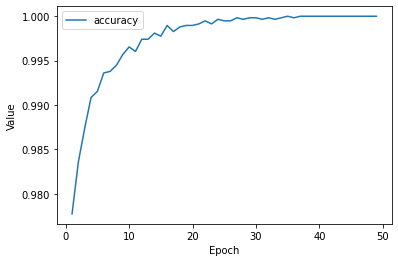

In [102]:
learning_rate = 0.05
epochs = 50
batch_size = 100
label_name = "fraudulent"
classification_threshold = 0.45

METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
          ]

my_model = create_model(learning_rate, feature_layer, METRICS)

epochs, hist = train_model(my_model, train, epochs, 
                           label_name, batch_size)

list_of_metrics_to_plot = ['accuracy'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)

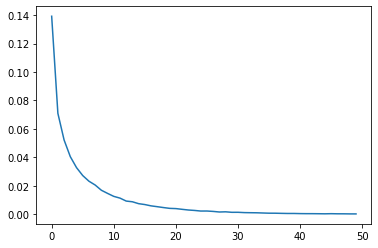

In [103]:
plt.plot(epochs,hist.loss)

In [1]:
features = {name:np.array(value) for name, value in test.items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size)

NameError: ignored